# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# ACTIVITY

Datasets used:

Brazil car sales records from 1990 to 2022 - https://www.kaggle.com/datasets/yousefmoterassed/brazil-car-sales-records-from-1990-to-2022?select=dados.csv

Gas Prices in Brazil https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil


## Question
### Is there a relation between gas prices and car sales?

In [2]:
import numpy as np
import pandas as pd
import matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt

#
# load dadasets
#

# car sales
df=pd.read_csv('dados.csv')
df['Date']= pd.to_datetime(df['Date'], format='%d,%m,%Y')
# gas price
gp = pd.read_csv('2004-2021.tsv', delimiter = '\t')

df.head()

,Date,Value
0,1990-01-01,69792
1,1990-02-01,57258
2,1990-03-01,32740
3,1990-04-01,32812
4,1990-05-01,58464


In [3]:
#
# uses only GAS and uses onle São Paulo state (richest in Brazil)
#
gp = gp[gp['PRODUTO'] == 'GASOLINA COMUM']
gp = gp[gp['ESTADO'] == 'SAO PAULO']
gp2 = gp.filter(['DATA INICIAL','PREÇO MÉDIO REVENDA'], axis=1)
gp2.columns = ['Date','Price']
gp2['Date']= pd.to_datetime(gp2['Date'], format='%Y-%m-%d')
gp2 = gp2.reset_index()
del gp2['index']
gp2.head()

,Date,Price
0,2004-05-09,1.891
1,2004-05-16,1.888
2,2004-05-23,1.894
3,2004-05-30,1.912
4,2004-06-06,1.919


In [4]:
#
# gets only date and medium price
#
gp2 = gp.filter(['DATA INICIAL','PREÇO MÉDIO REVENDA'], axis=1)
gp2.columns = ['Date','Price']
gp2['Date']= pd.to_datetime(gp2['Date'], format='%Y-%m-%d')
gp2 = gp2.reset_index()
del gp2['index']
gp2.head()

,Date,Price
0,2004-05-09,1.891
1,2004-05-16,1.888
2,2004-05-23,1.894
3,2004-05-30,1.912
4,2004-06-06,1.919


In [5]:
#
# join datasets by date
#

df2 = pd.merge(df,gp2,how='outer',on ='Date')
df2 = df2.dropna()
df2['Value'] = df2['Value']/1000
df2.head()

,Date,Value,Price
175,2004-08-01,130.234,2.030
184,2005-05-01,143.000,2.186
192,2006-01-01,132.900,2.383
201,2006-10-01,175.186,2.453
207,2007-04-01,179.334,2.426


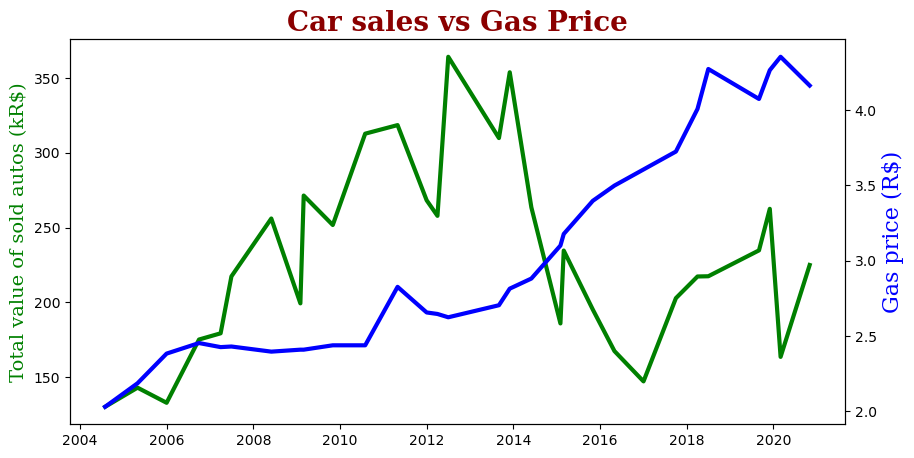

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Car sales vs Gas Price',fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        })
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(df2['Date'], df2['Value'], color = 'g',lw=3)
ax2.plot(df2['Date'], df2['Price'], color = 'b',lw=3)


# giving labels to the axises
ax.set_xlabel('')
ax.set_ylabel('Total value of sold autos (kR$)', color = 'g', fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        })
 
# secondary y-axis label
ax2.set_ylabel('Gas price (R$)', color = 'b', fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        })
 

# show plot
plt.show()

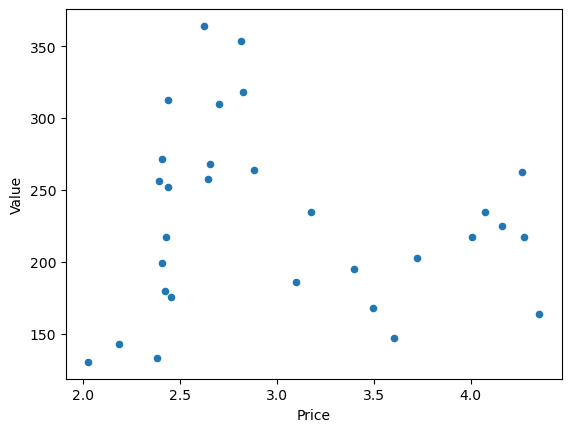

In [7]:
df2.plot('Price','Value', kind = 'scatter');

### Analisys

As we can see, from 2004 to 2014, car prices and gas prices have been increasing in a steady way. Then, by 2015, car sales dropped a lot and gas prices continue to increas but in a faster way.
Data does not explain why but searching show that in 2015 there were 3 facts: political crisis in Brazil, dolar rate went up, low GDP
